In [1]:
import tensorflow

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import load_model

In [4]:
from tensorflow.keras.layers import UpSampling2D

In [5]:
custom_objects = {'BilinearUpSampling2D': UpSampling2D, 'depth_loss_function': None}

In [6]:
model = load_model('models/dnet121-sid-e1/model.h5', custom_objects=custom_objects, compile=False)

In [7]:
def nyu_resize(img, resolution=224, padding=6):
    from skimage.transform import resize
    return resize(img, (resolution, resolution), preserve_range=True, mode='reflect', anti_aliasing=True )

In [29]:
vid = cv2.VideoCapture('dance_Trim.mp4')
ret, img = vid.read()
img.shape

(360, 640, 3)

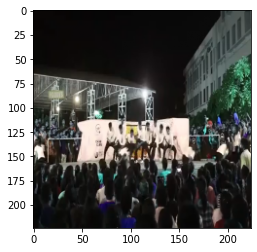

In [30]:
img = nyu_resize(img)
img = img/img.max()
plt.imshow(img)

In [31]:
batch = img.reshape((1,*img.shape))
batch.shape

(1, 224, 224, 3)

In [32]:
dmap = model(batch)

In [33]:
dmap.shape

TensorShape([1, 112, 112, 1])

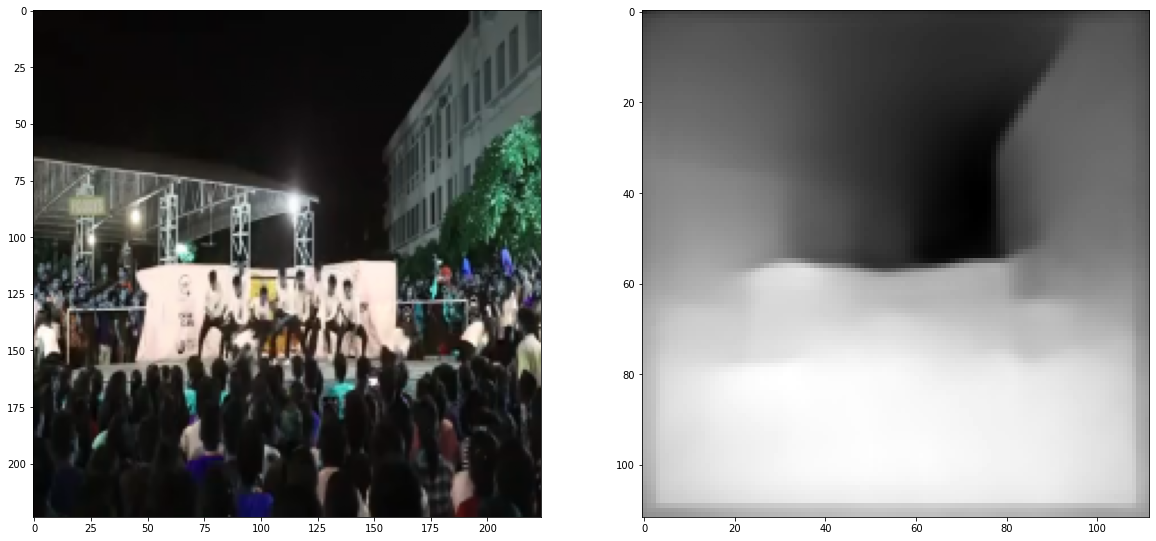

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dmap[0], cmap='gray')